# Banxi Site Analysis

In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [2]:
def list_components(df):
    components = []
    for i in range(len(df.index)):
        if df['dir_comp_name'][i] not in components:
            components.append(df['dir_comp_name'][i])
    print(components)

## Data

In [3]:
PM_data1 = pd.read_csv('PM_data1/sites.txt',sep='\t',header=1)
PM_data2 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
PM_data1.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [4]:
PM_data1_specimens = pd.read_csv('PM_data1/specimens.txt',sep='\t',header=1)
PM_data2_specimens = pd.read_csv('PM_data2/specimens.txt',sep='\t',header=1)
PM_data1_specimens.columns

Index(['specimen', 'experiments', 'sample', 'dir_alpha95', 'dir_comp',
       'dir_dec', 'dir_inc', 'dir_n_comps', 'dir_n_measurements',
       'dir_tilt_correction', 'dir_dang', 'dir_mad_free', 'meas_step_max',
       'meas_step_min', 'meas_step_unit', 'analysts', 'instrument_codes',
       'software_packages', 'int_corr', 'citations', 'method_codes',
       'result_quality', 'volume', 'weight', 'location', 'site'],
      dtype='object')

In [5]:
PM_data1_samples = pd.read_csv('PM_data1/samples.txt',sep='\t',header=1)
PM_data2_samples = pd.read_csv('PM_data2/samples.txt',sep='\t',header=1)
PM_data1_samples.columns

Index(['analysts', 'azimuth', 'azimuth_dec_correction', 'bed_dip',
       'bed_dip_direction', 'citations', 'dip', 'geologic_classes',
       'geologic_types', 'height', 'lithologies', 'method_codes', 'sample',
       'site'],
      dtype='object')

In [6]:
list_components(PM_data1)

['HT1', 'HT1_0', 'MT1', 'HT2', 'LT1']


In [7]:
list_components(PM_data2)

['HT1', 'LT1']


In [8]:
PM_data1_HT = PM_data1[PM_data1.dir_comp_name == 'HT1'].copy()
PM_data1_HT_filtered = PM_data1_HT[PM_data1_HT.dir_alpha95 < 20].copy()
PM_data1_HT_tc = PM_data1_HT_filtered[PM_data1_HT_filtered.dir_tilt_correction == 100].copy()
PM_data1_HT_is = PM_data1_HT_filtered[PM_data1_HT_filtered.dir_tilt_correction == 0].copy()

PM_data1_HT_site = PM_data1_HT_tc['site'].copy()

PM_data1_HT_tc_dec = PM_data1_HT_tc.dir_dec.tolist()
PM_data1_HT_tc_inc = PM_data1_HT_tc.dir_inc.tolist()
PM_data1_HT_tc_a95 = PM_data1_HT_tc.dir_alpha95.tolist()

PM_data1_HT_is_dec = PM_data1_HT_is.dir_dec.tolist()
PM_data1_HT_is_inc = PM_data1_HT_is.dir_inc.tolist()
PM_data1_HT_is_a95 = PM_data1_HT_is.dir_alpha95.tolist()

PM_data1_HT_site

50    TR014
Name: site, dtype: object

In [9]:
PM_data2_HT = PM_data2[PM_data2.dir_comp_name == 'HT1'].copy()
PM_data2_HT_filtered = PM_data2_HT[PM_data2_HT.dir_alpha95 < 20].copy()
PM_data2_HT_tc = PM_data2_HT_filtered[PM_data2_HT_filtered.dir_tilt_correction == 100].copy()
PM_data2_HT_is = PM_data2_HT_filtered[PM_data2_HT_filtered.dir_tilt_correction == 0].copy()

PM_data2_HT_site = PM_data2_HT_tc['site'].copy()

PM_data2_HT_tc_dec = PM_data2_HT_tc.dir_dec.tolist()
PM_data2_HT_tc_inc = PM_data2_HT_tc.dir_inc.tolist()
PM_data2_HT_tc_a95 = PM_data2_HT_tc.dir_alpha95.tolist()

PM_data2_HT_is_dec = PM_data2_HT_is.dir_dec.tolist()
PM_data2_HT_is_inc = PM_data2_HT_is.dir_inc.tolist()
PM_data2_HT_is_a95 = PM_data2_HT_is.dir_alpha95.tolist()

PM_data2_HT_site

2     TR018
6     TR020
14    TR024
18    TR026
22    TR035
30    TR042
Name: site, dtype: object

In [10]:
all_HT_tc_dec = np.append([PM_data1_HT_tc_dec], [PM_data2_HT_tc_dec])
all_HT_tc_inc = np.append([PM_data1_HT_tc_inc], [PM_data2_HT_tc_inc])
all_HT_tc_a95 = np.append([PM_data1_HT_tc_a95], [PM_data2_HT_tc_a95])

all_HT_is_dec = np.append([PM_data1_HT_is_dec], [PM_data2_HT_is_dec])
all_HT_is_inc = np.append([PM_data1_HT_is_inc], [PM_data2_HT_is_inc])
all_HT_is_a95 = np.append([PM_data1_HT_is_a95], [PM_data2_HT_is_a95])

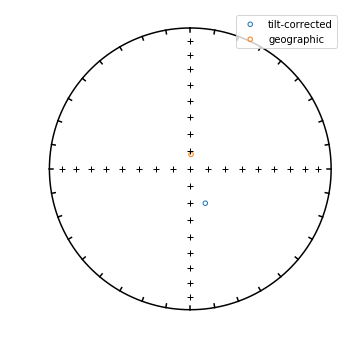

In [11]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(PM_data1_HT_tc_dec, PM_data1_HT_tc_inc, color='C0', label='tilt-corrected')
ipmag.plot_di(PM_data1_HT_is_dec, PM_data1_HT_is_inc, color='C1', label='geographic')
plt.legend(loc=1)
plt.show()

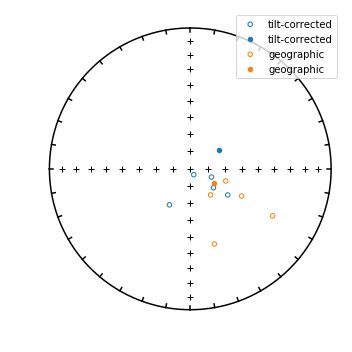

In [12]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(PM_data2_HT_tc_dec, PM_data2_HT_tc_inc, color='C0', label='tilt-corrected')
ipmag.plot_di(PM_data2_HT_is_dec, PM_data2_HT_is_inc, color='C1', label='geographic')
plt.legend(loc=1)
plt.show()

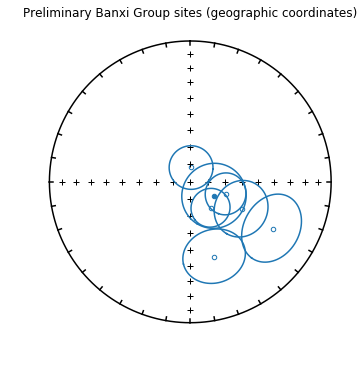

In [13]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(all_HT_is_dec)):
    if all_HT_is_a95[i] < 20:
        ipmag.plot_di_mean(all_HT_is_dec[i], all_HT_is_inc[i], all_HT_is_a95[i],color='C0')
plt.title('Preliminary Banxi Group sites (geographic coordinates)',fontsize=12)
#plt.savefig('preliminary_geographic.svg')
plt.show()

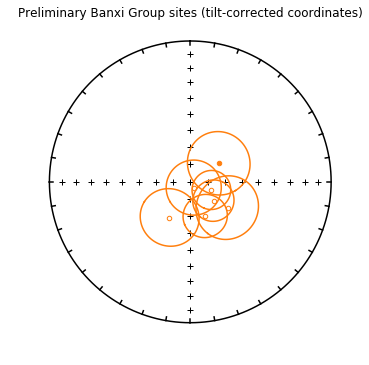

In [14]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
for i in range(len(all_HT_tc_dec)):
    if all_HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(all_HT_tc_dec[i], all_HT_tc_inc[i], all_HT_tc_a95[i],color='C1')
plt.title('Preliminary Banxi Group sites (tilt-corrected coordinates)',fontsize=12)
#plt.savefig('preliminary_tiltcorrected.svg')
plt.show()

In [15]:
HT_is_inc_flipped = []
HT_is_dec_flipped = []
HT_tc_inc_flipped = []
HT_tc_dec_flipped = []

for i in range(len(all_HT_tc_dec)):
    if all_HT_tc_inc[i] > 0:
        HT_is_inc_flipped.append(-all_HT_is_inc[i])
        HT_is_dec_flipped.append(all_HT_is_dec[i]+180)
        HT_tc_inc_flipped.append(-all_HT_tc_inc[i])
        HT_tc_dec_flipped.append(all_HT_tc_dec[i]+180)
    else:
        HT_is_inc_flipped.append(all_HT_is_inc[i])
        HT_is_dec_flipped.append(all_HT_is_dec[i])
        HT_tc_inc_flipped.append(all_HT_tc_inc[i])
        HT_tc_dec_flipped.append(all_HT_tc_dec[i])

HT_tc_mean = ipmag.fisher_mean(HT_tc_dec_flipped,HT_tc_inc_flipped)
HT_is_mean = ipmag.fisher_mean(HT_is_dec_flipped,HT_is_inc_flipped)
ipmag.print_direction_mean(HT_tc_mean)
print('')
ipmag.print_direction_mean(HT_is_mean)

Dec: 161.1  Inc: -76.8
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 11.7
Precision parameter (k) estimate: 27.5

Dec: 129.6  Inc: -68.7
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 21.6
Precision parameter (k) estimate: 8.8


## Fold Test

### Samples

In [16]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# round 1
PM_data1_specimen_HT = PM_data1_specimens[(PM_data1_specimens['dir_comp']=='HT1')&\
                                          (PM_data1_specimens['dir_tilt_correction']==0)&\
                                          (PM_data1_specimens['site']=='TR014')].copy()
PM_data1_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data1_specimen_HT.index)):
    for j in range(len(PM_data1_samples.index)):
        if PM_data1_specimen_HT['sample'][i] == PM_data1_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data1_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data1_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data1_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data1_samples['bed_dip'][j])
            break

# round 2
PM_data2_specimen_HT = PM_data2_specimens[(PM_data2_specimens['dir_comp']=='HT1')&\
                                          (PM_data2_specimens['dir_tilt_correction']==0)&\
                                          ((PM_data2_specimens['site']=='TR018')|\
                                           (PM_data2_specimens['site']=='TR020')|\
                                           (PM_data2_specimens['site']=='TR024')|\
                                           (PM_data2_specimens['site']=='TR026')|\
                                           (PM_data2_specimens['site']=='TR035')|\
                                           (PM_data2_specimens['site']=='TR042'))].copy()
PM_data2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data2_specimen_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if PM_data2_specimen_HT['sample'][i] == PM_data2_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

doing  1000  iterations...please be patient.....


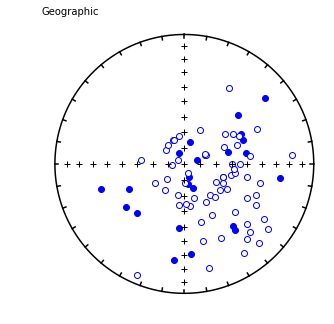

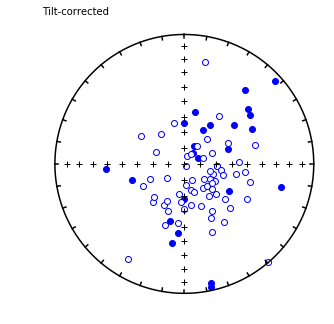


tightest grouping of vectors obtained at (95% confidence bounds):
63 - 113 percent unfolding
range of all bootstrap samples: 
33  -  119 percent unfolding


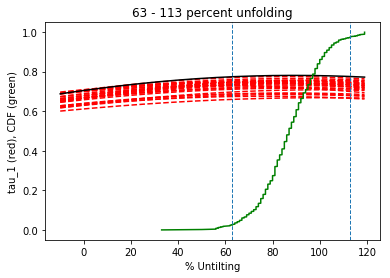

In [17]:
ipmag.bootstrap_fold_test(fold_test_array)

### Sites

TR035 uses different beddings through the site... not included in analysis for now. The rest of the sites have a single bedding for the whole site.

In [18]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

# round 1
PM_data1_HT = PM_data1[(PM_data1['dir_comp_name']=='HT1')&\
                       (PM_data1['dir_tilt_correction']==0)&\
                       (PM_data1['site']=='TR014')].copy()
PM_data1_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data1_HT.index)):
    for j in range(len(PM_data1_samples.index)):
        if PM_data1_HT['site'][i] == PM_data1_samples['site'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data1_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data1_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data1_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data1_samples['bed_dip'][j])
            break
            
# round 2
PM_data2_HT = PM_data2[(PM_data2['dir_comp_name']=='HT1')&\
                       (PM_data2['dir_tilt_correction']==0)&\
                       ((PM_data2['site']=='TR018')|\
                        (PM_data2['site']=='TR020')|\
                        (PM_data2['site']=='TR024')|\
                        (PM_data2['site']=='TR026')|\
                        (PM_data2['site']=='TR042'))].copy()
PM_data2_HT.reset_index(drop=True, inplace=True)
for i in range(len(PM_data2_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if PM_data2_HT['site'][i] == PM_data2_samples['site'][j]:
            fold_test_decs = np.append(fold_test_decs, PM_data2_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, PM_data2_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

doing  1000  iterations...please be patient.....


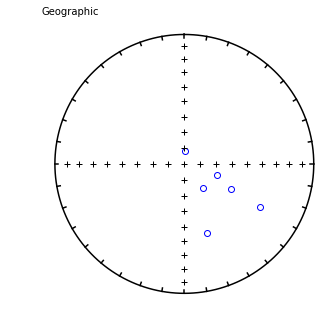

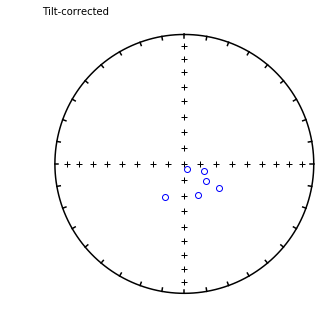


tightest grouping of vectors obtained at (95% confidence bounds):
65 - 116 percent unfolding
range of all bootstrap samples: 
49  -  119 percent unfolding


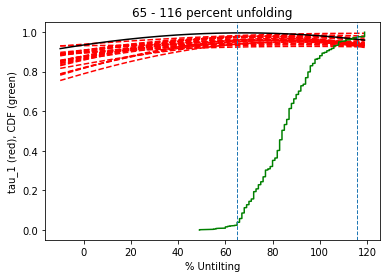

In [19]:
ipmag.bootstrap_fold_test(fold_test_array)

### Luoman Local Fold Test

In [20]:
fold_test_decs = np.array([])
fold_test_incs = np.array([])
fold_test_dip_dir = np.array([])
fold_test_dip = np.array([])

Luoman2_specimen_HT = PM_data2_specimens[(PM_data2_specimens['dir_comp']=='HT1')&\
                                         (PM_data2_specimens['dir_tilt_correction']==0)&\
                                         ((PM_data2_specimens['site']=='TR035')|\
                                          (PM_data2_specimens['site']=='TR036')|\
                                          (PM_data2_specimens['site']=='TR042'))].copy()
Luoman2_specimen_HT.reset_index(drop=True, inplace=True)
for i in range(len(Luoman2_specimen_HT.index)):
    for j in range(len(PM_data2_samples.index)):
        if Luoman2_specimen_HT['sample'][i] == PM_data2_samples['sample'][j]:
            fold_test_decs = np.append(fold_test_decs, Luoman2_specimen_HT['dir_dec'][i])
            fold_test_incs = np.append(fold_test_incs, Luoman2_specimen_HT['dir_inc'][i])
            fold_test_dip_dir = np.append(fold_test_dip_dir, PM_data2_samples['bed_dip_direction'][j])
            fold_test_dip = np.append(fold_test_dip, PM_data2_samples['bed_dip'][j])
            break
            
for i in range(len(fold_test_dip_dir)):
    if fold_test_dip_dir[i]>360:
        fold_test_dip_dir[i]=fold_test_dip_dir[i]-360
        
fold_test_array = ipmag.make_diddd_array(fold_test_decs,fold_test_incs,fold_test_dip_dir,fold_test_dip)

doing  1000  iterations...please be patient.....


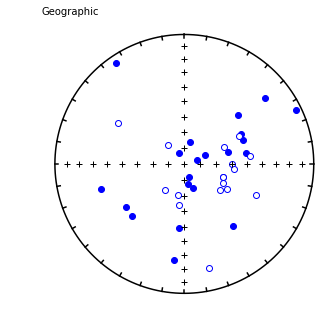

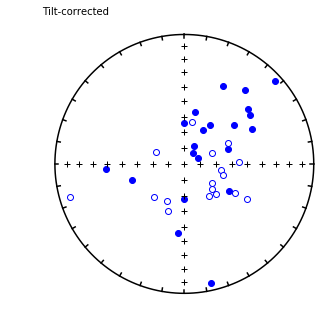


tightest grouping of vectors obtained at (95% confidence bounds):
27 - 119 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


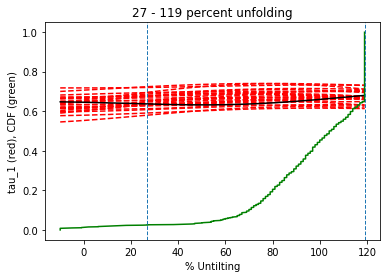

In [23]:
ipmag.bootstrap_fold_test(fold_test_array)

## Maps

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np

In [ ]:
PM_data2_HT_tc.index

In [ ]:
PM_data2_vgp_lat = []
PM_data2_vgp_lon = []

for i in PM_data2_HT_tc.index:
    if PM_data2_HT_tc.dir_inc[i] > 0:
        PM_data2_vgp_lat.append(PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i])
    else:
        PM_data2_vgp_lat.append(-PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i]-180)
        
PM_data2_pole = ipmag.fisher_mean(dec=PM_data2_vgp_lon,inc=PM_data2_vgp_lat)
ipmag.print_pole_mean(PM_data2_pole)

In [ ]:
PM_data2_vgp_lat

In [ ]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=140,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

ipmag.plot_vgp(pmap,vgp_lon=PM_data2_vgp_lon,vgp_lat=PM_data2_vgp_lat)
        

plt.show()

In [ ]:
ipmag.lat_from_pole(PM_data2_HT_tc.lon[2],PM_data2_HT_tc.lat[2],PM_data2_pole['dec'],PM_data2_pole['inc'])

In [ ]:
PM_data2_HT_tc.site